In [143]:
import numpy as np


def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])


def r_precision(r):
    r = np.asarray(r) != 0
    z = r.nonzero()[0]
    if not z.size:
        return 0.
    return np.mean(r[:z[-1] + 1])


def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)


def average_precision(r,max_k):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(max_k) if r[k]]
    if not out:
        return 0.
    return np.mean(out)


def mean_average_precision_at_k(rs,max_k):
    return np.mean([average_precision(r,max_k) for r in rs])

# def dcg_at_k(r, k, method=0):
#     r = np.asfarray(r)[:k]
#     if r.size:
#         if method == 0:
#             return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
#         elif method == 1:
#             return np.sum(r / np.log2(np.arange(2, r.size + 2)))
#         else:
#             raise ValueError('method must be 0 or 1.')
#     return 0.


# def ndcg_at_k(r, k, method=0):
#     dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
#     if not dcg_max:
#         return 0.
#     return dcg_at_k(r, k, method) / dcg_max

#KAGGLE
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.


def ndcg_at_k(r, k):
    idcg = dcg_at_k(sorted(r, reverse=True), k)
    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg

In [175]:
import pandas as pd
import numpy as np

df = pd.read_csv('../csv/statistics.csv')
df = df.dropna()
df.head(11)

,query,npmjs.com_optimal,WeightedBordaFuse,lucene,npmsearch.com,M1,M2,M3,M4,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedFirstRankingAgregator,Filter_google.com_hyp_match
0,download free music,csv/statistics/npmjs.com_optimal_download free...,csv/statistics/WeightedBordaFuse_download free...,csv/statistics/lucene_download free music.csv,csv/statistics/npmsearch.com_download free mus...,csv/statistics/M1_download free music.csv,csv/statistics/M2_download free music.csv,csv/statistics/M3_download free music.csv,csv/statistics/M4_download free music.csv,csv/statistics/BordaFuse_download free music.csv,csv/statistics/Cordorcet_download free music.csv,csv/statistics/BoostedBordaFuse_download free ...,csv/statistics/WeightedFirstRankingAgregator_d...,csv/statistics/Filter_google.com_hyp_match_dow...
1,convert typewritten image to text document,csv/statistics/npmjs.com_optimal_convert typew...,csv/statistics/WeightedBordaFuse_convert typew...,csv/statistics/lucene_convert typewritten imag...,csv/statistics/npmsearch.com_convert typewritt...,csv/statistics/M1_convert typewritten image to...,csv/statistics/M2_convert typewritten image to...,csv/statistics/M3_convert typewritten image to...,csv/statistics/M4_convert typewritten image to...,csv/statistics/BordaFuse_convert typewritten i...,csv/statistics/Cordorcet_convert typewritten i...,csv/statistics/BoostedBordaFuse_convert typewr...,csv/statistics/WeightedFirstRankingAgregator_c...,csv/statistics/Filter_google.com_hyp_match_con...
2,download web videos,csv/statistics/npmjs.com_optimal_download web ...,csv/statistics/WeightedBordaFuse_download web ...,csv/statistics/lucene_download web videos.csv,csv/statistics/npmsearch.com_download web vide...,csv/statistics/M1_download web videos.csv,csv/statistics/M2_download web videos.csv,csv/statistics/M3_download web videos.csv,csv/statistics/M4_download web videos.csv,csv/statistics/BordaFuse_download web videos.csv,csv/statistics/Cordorcet_download web videos.csv,csv/statistics/BoostedBordaFuse_download web v...,csv/statistics/WeightedFirstRankingAgregator_d...,csv/statistics/Filter_google.com_hyp_match_dow...
3,check valid email address,csv/statistics/npmjs.com_optimal_check valid e...,csv/statistics/WeightedBordaFuse_check valid e...,csv/statistics/lucene_check valid email addres...,csv/statistics/npmsearch.com_check valid email...,csv/statistics/M1_check valid email address.csv,csv/statistics/M2_check valid email address.csv,csv/statistics/M3_check valid email address.csv,csv/statistics/M4_check valid email address.csv,csv/statistics/BordaFuse_check valid email add...,csv/statistics/Cordorcet_check valid email add...,csv/statistics/BoostedBordaFuse_check valid em...,csv/statistics/WeightedFirstRankingAgregator_c...,csv/statistics/Filter_google.com_hyp_match_che...
4,send sms,csv/statistics/npmjs.com_optimal_send sms.csv,csv/statistics/WeightedBordaFuse_send sms.csv,csv/statistics/lucene_send sms.csv,csv/statistics/npmsearch.com_send sms.csv,csv/statistics/M1_send sms.csv,csv/statistics/M2_send sms.csv,csv/statistics/M3_send sms.csv,csv/statistics/M4_send sms.csv,csv/statistics/BordaFuse_send sms.csv,csv/statistics/Cordorcet_send sms.csv,csv/statistics/BoostedBordaFuse_send sms.csv,csv/statistics/WeightedFirstRankingAgregator_s...,csv/statistics/Filter_google.com_hyp_match_sen...
5,extract barcode from image,csv/statistics/npmjs.com_optimal_extract barco...,csv/statistics/WeightedBordaFuse_extract barco...,csv/statistics/lucene_extract barcode from ima...,csv/statistics/npmsearch.com_extract barcode f...,csv/statistics/M1_extract barcode from image.csv,csv/statistics/M2_extract barcode from image.csv,csv/statistics/M3_extract barcode from image.csv,csv/statistics/M4_extract barcode from image.csv,csv/statistics/BordaFuse_extract barcode from ...,csv/statistics/Cordorcet_extract barcode from ...,csv/statistics/BoostedBordaFuse_extract barcod...,csv/statistics/WeightedFirstRankingAgregator_e...,csv/statistics/Filter_google.com_hyp_match_ext

In [176]:
searchers = list(df).copy()
del searchers[0]

for query in range(df['query'].size):
    for searcher in range(len(searchers)):
        mt = pd.read_csv('../'+df.iloc[query][searcher+1])
        df.iloc[query][searcher+1] = mt
     

In [187]:
#df = pd.DataFrame([list(s1), list(s2)],  columns =  ["A", "B", "C"])

max_k = 21
resultall = []
result_precision = []
result_hits = []
result_recall = []
result_fmeasure = []
result_ndcg_k = []
result_mean_average_precision = []

#Searchers Used
#print(searchers)
arr_searchers = pd.Series(['npmsearch.com', 
                           'M2', 'M3', 
                           'BordaFuse', 'Cordorcet', 'WeightedBordaFuse', 'BoostedBordaFuse', 
                           'WeightedFirstRankingAgregator','Filter_google.com_hyp_match','npmjs.com_optimal'])
#Queries Used
#print(df['query'].tolist())
arr_queries = pd.Series(['download free music','convert typewritten image to text document',
                         'download web videos','check valid email address','send sms',
                         'extract barcode from image','quick sort algorithm','user authentication',
                         'filter adult content images','convert data formats'])


#Calculo de precision, recall y hits
for k in range(1,max_k):
    #print(k)
    searchersrow = []
    row_precision = []
    row_hits = []
    row_recall = []
    row_fmeasure = []
    row_ndcg_k = []
    row_mean_average_precision = []
       
    for searcher in range(arr_searchers.size):
        #print(searchers[searcher])
        sum_hits = 0
        sum_precision = 0
        sum_recall = 0
        sum_fmeasure = 0
        sum_ndcg_k = 0
        arr_rs = []    
    
        for query in range(arr_queries.size):
            #print(arr_queries[query])
            idxq = df.index[df['query'] == arr_queries[query]].tolist()
            idxs = searchers.index(arr_searchers[searcher])
            sxq = df.iloc[idxq[0]][idxs+1]
            sxq = sxq.set_index('k')
            sum_hits += sxq.loc[k]['#hits']
            sum_precision += sxq.loc[k]['precision']
            sum_recall += sxq.loc[k]['recall']
            sum_fmeasure += sxq.loc[k]['fmeasure']
            sum_ndcg_k += ndcg_at_k(sxq['hit'],k)
            arr_rs.append(sxq['hit']);
            
        prom_hits = sum_hits/arr_queries.size
        prom_precision = sum_precision/arr_queries.size
        prom_recall = sum_recall/arr_queries.size
        prom_fmeasure = sum_fmeasure/arr_queries.size
        prom_ndcg_k = sum_ndcg_k/arr_queries.size
        mean_average_precision = mean_average_precision_at_k(arr_rs,k)
        #print(prom_hits)
        #print(prom_precision)
        #print(prom_recall)
        #print(prom_fmeasure)
        searcherprom = pd.DataFrame([[prom_hits,prom_precision,prom_recall,prom_fmeasure,prom_ndcg_k,mean_average_precision]],  columns =  ["hits", "precision", "recall", "fmeasure","ncdg","map"])
        searchersrow.append(searcherprom)
        row_precision.append(prom_precision)
        row_hits.append(prom_hits)
        row_recall.append(prom_recall)
        row_fmeasure.append(prom_fmeasure)
        row_ndcg_k.append(prom_ndcg_k)
        row_mean_average_precision.append(mean_average_precision)
    #print(searchersrow)
    resultall.append([k]+searchersrow)
    result_precision.append([k]+row_precision)
    result_hits.append([k]+row_hits)
    result_recall.append([k]+row_recall)
    result_fmeasure.append([k]+row_fmeasure)
    result_ndcg_k.append([k]+row_ndcg_k)
    result_mean_average_precision.append([k]+row_mean_average_precision)

columnsk = ['k'] + arr_searchers
dataframek = pd.DataFrame(resultall, columns =  ['k'] + arr_searchers.tolist())
dataframek = dataframek.set_index('k')
dataframek.head(3)

dataframe_hits = pd.DataFrame(result_hits, columns =  ['k'] + arr_searchers.tolist())
dataframe_recall = pd.DataFrame(result_recall, columns =  ['k'] + arr_searchers.tolist())
dataframe_fmeasure = pd.DataFrame(result_fmeasure, columns =  ['k'] + arr_searchers.tolist())
dataframe_precision = pd.DataFrame(result_precision, columns =  ['k'] + arr_searchers.tolist())
dataframe_ndcg_k = pd.DataFrame(result_ndcg_k, columns =  ['k'] + arr_searchers.tolist())
dataframe_average_precision = pd.DataFrame(result_mean_average_precision, columns =  ['k'] + arr_searchers.tolist())

dataframe_ndcg_k.head(20)


,k,npmsearch.com,M2,M3,BordaFuse,Cordorcet,WeightedBordaFuse,BoostedBordaFuse,WeightedFirstRankingAgregator,Filter_google.com_hyp_match,npmjs.com_optimal
0,1,0.200000,0.400000,0.400000,0.400000,0.600000,0.700000,0.400000,0.500000,0.500000,0.700000
1,2,0.301778,0.438685,0.283944,0.554741,0.561315,0.661315,0.554741,0.616056,0.500000,0.661315
2,3,0.292701,0.523464,0.311175,0.635752,0.476536,0.670392,0.635752,0.659216,0.453072,0.668508
3,4,0.304536,0.519519,0.326109,0.646554,0.497294,0.658557,0.646554,0.649260,0.536561,0.680829
4,5,0.299098,0.519164,0.338010,0.674461,0.512975,0.684889,0.661341,0.676812,0.536561,0.706982
5,6,0.305996,0.511258,0.324946,0.686727,0.527295,0.696031,0.685800,0.688825,0.536561,0.701912
6,7,0.311228,0.507014,0.334288,0.667159,0.511426,0.699814,0.675479,0.678227,0.536561,0.698066
7,8,0.315366,0.519616,0.351224,0.664556,0.502939,0.710786,0.664233,0.690700,0.536561,0.703004
8,9,0.318743,0.541692,0.360300,0.669508,0.532408,0.705587,0.669208,0.686727,0.536561,0.699957
9,10,0.315203,0.551087,0.389641,0.673909,0.559513,0.714959,0.673628,0.695143,0.536561,0.697412


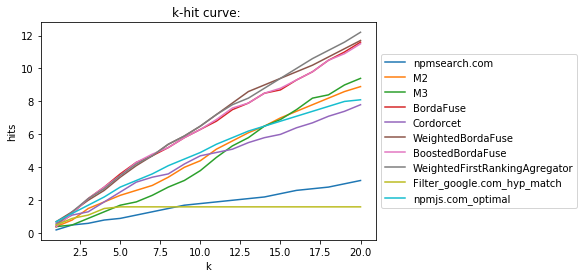

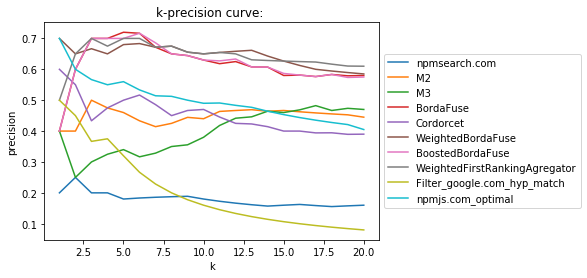

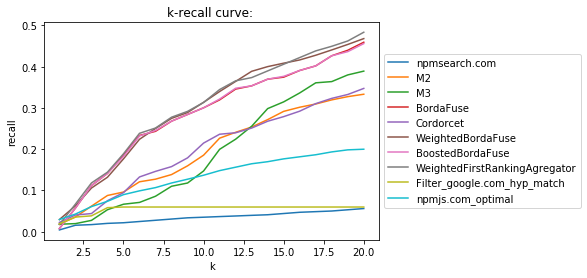

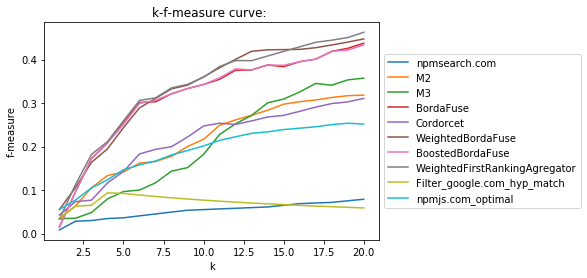

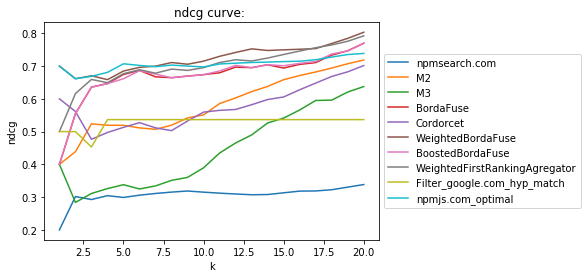

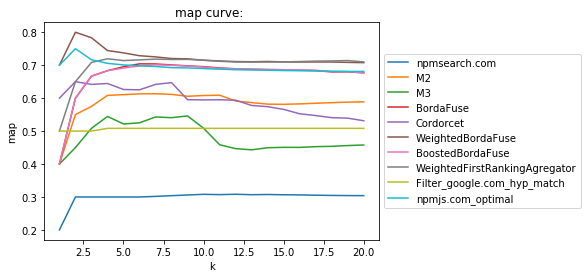

In [188]:
import matplotlib.pyplot as pl

def plplotk(pl,searcher,dataf):
        pl.plot(dataf['k'].tolist(), dataf[searcher].tolist(), label=searcher)

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_hits)
    
pl.xlabel('k')
pl.ylabel('hits')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-hit curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_precision)
    
pl.xlabel('k')
pl.ylabel('precision')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-precision curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_recall)
    
pl.xlabel('k')
pl.ylabel('recall')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-recall curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_fmeasure)
    
pl.xlabel('k')
pl.ylabel('f-measure')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-f-measure curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_ndcg_k)
    
pl.xlabel('k')
pl.ylabel('ndcg')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('ndcg curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(arr_searchers.size):
    plplotk(pl,arr_searchers[searcher],dataframe_average_precision)
    
pl.xlabel('k')
pl.ylabel('map')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('map curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()



In [194]:
dataframe_ndcg_k.head(20)

,k,npmsearch.com,M2,M3,BordaFuse,Cordorcet,WeightedBordaFuse,BoostedBordaFuse,WeightedFirstRankingAgregator,Filter_google.com_hyp_match,npmjs.com_optimal
0,1,0.200000,0.400000,0.400000,0.400000,0.600000,0.700000,0.400000,0.500000,0.500000,0.700000
1,2,0.301778,0.438685,0.283944,0.554741,0.561315,0.661315,0.554741,0.616056,0.500000,0.661315
2,3,0.292701,0.523464,0.311175,0.635752,0.476536,0.670392,0.635752,0.659216,0.453072,0.668508
3,4,0.304536,0.519519,0.326109,0.646554,0.497294,0.658557,0.646554,0.649260,0.536561,0.680829
4,5,0.299098,0.519164,0.338010,0.674461,0.512975,0.684889,0.661341,0.676812,0.536561,0.706982
5,6,0.305996,0.511258,0.324946,0.686727,0.527295,0.696031,0.685800,0.688825,0.536561,0.701912
6,7,0.311228,0.507014,0.334288,0.667159,0.511426,0.699814,0.675479,0.678227,0.536561,0.698066
7,8,0.315366,0.519616,0.351224,0.664556,0.502939,0.710786,0.664233,0.690700,0.536561,0.703004
8,9,0.318743,0.541692,0.360300,0.669508,0.532408,0.705587,0.669208,0.686727,0.536561,0.699957
9,10,0.315203,0.551087,0.389641,0.673909,0.559513,0.714959,0.673628,0.695143,0.536561,0.697412


In [186]:
for k in range(20):
    print(dcg_at_k([1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],k+1))

print(1.63/10)

1.0
1.63092975357
2.13092975357
2.56160631164
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
2.94845911888
0.16299999999999998
